# Homework Assignment Number One

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Section 1: Police killings

In [2]:
killings = pd.read_csv('../data/police-killings.csv', encoding='cp1252', index_col=[0])
killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 1. Make the following changes to column names:

- lawenforcementagency -> agency
- raceethnicity -> race

In [3]:
killings.rename(columns={'lawenforcementagency':'agency','raceethnicity':'race'}, inplace=True)

In [4]:
killings.count()

name             467
age              467
gender           467
race             467
month            467
day              467
year             467
streetaddress    463
city             467
state            467
agency           467
cause            467
armed            467
county_income    467
dtype: int64

### 2. Show the count of missing values in each column

In [5]:
killings.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 3. Replace each null value in the dataframe with the string "unknown"

In [6]:
killings.fillna('unknown', inplace=True)

In [7]:
# killings[killings.streetaddress=='unknown']

### 4. How many killings were there in March and April?

In [8]:
((killings.month=='March') | (killings.month=='April')).sum()

210

### 5. How many male and how many female victims are there?

In [11]:
killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

### 6. How many killings were of unarmed people?

In [12]:
(killings.armed=='No').sum()

102

### 7. What percentage of all killings were unarmed?

In [13]:
total = len(killings.index)
unarmed = (killings.armed=='No').sum()
(unarmed)/total*100

21.841541755888652

In [14]:
killings.armed.value_counts(normalize=True)['No']

0.21841541755888652

### 8. What are the 5 states with the most killings?

In [19]:
killings.groupby('state').count().sort_values(by='name', ascending=False).head()

,name,age,gender,race,month,day,year,streetaddress,city,agency,cause,armed,county_income
state,,,,,,,,,,,,,
CA,74,74,74,74,74,74,74,74,74,74,74,74,74
TX,46,46,46,46,46,46,46,46,46,46,46,46,46
FL,29,29,29,29,29,29,29,29,29,29,29,29,29
AZ,25,25,25,25,25,25,25,25,25,25,25,25,25
OK,22,22,22,22,22,22,22,22,22,22,22,22,22


### 9. Show a value counts of deaths for each race

In [38]:
killings.groupby('race').count()['name'].sort_values(ascending=False)


race
White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: name, dtype: int64

In [39]:
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

### 10. Display a histogram of ages of all killings

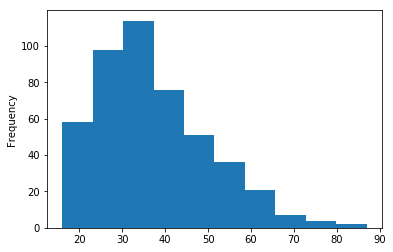

In [40]:
killings.age.plot(kind='hist')

In [48]:
# killings.plot(kind='hist', x='age')
# killings.plot.hist('age')

(array([  58.,   98.,  114.,   76.,   51.,   36.,   21.,    7.,    4.,    2.]),
 array([ 16. ,  23.1,  30.2,  37.3,  44.4,  51.5,  58.6,  65.7,  72.8,
         79.9,  87. ]),
 <a list of 10 Patch objects>)

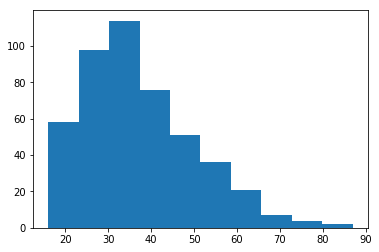

In [22]:
plt.hist(killings.age)

### 11. Show histogram of ages for each race

race
Asian/Pacific Islander    AxesSubplot(0.125,0.125;0.775x0.755)
Black                     AxesSubplot(0.125,0.125;0.775x0.755)
Hispanic/Latino           AxesSubplot(0.125,0.125;0.775x0.755)
Native American           AxesSubplot(0.125,0.125;0.775x0.755)
Unknown                   AxesSubplot(0.125,0.125;0.775x0.755)
White                     AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

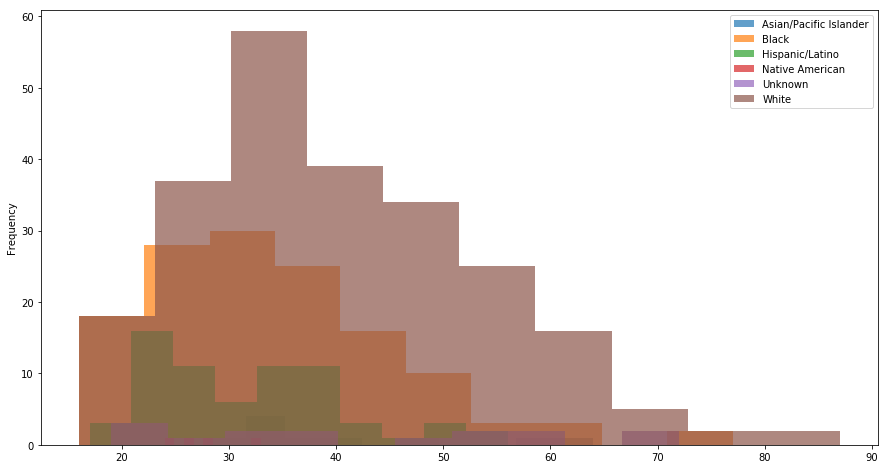

In [91]:
# plt.hist(killings.age)
# killings.groupby('race')['age'].hist(alpha=0.3, legend=True)
killings.groupby('race')['age'].plot(kind='hist', alpha=0.7, legend=True, figsize=(15,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22f204e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a22fd99e8>]], dtype=object)

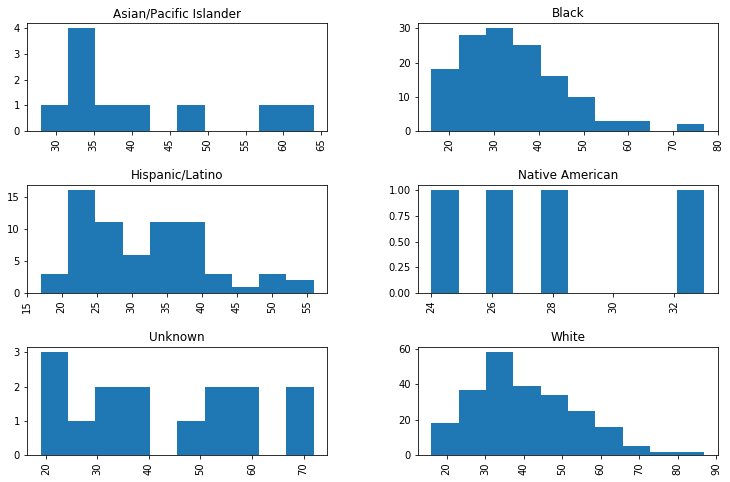

In [138]:
killings.hist(column='age', by='race', figsize=(12,8))

### 12. What is the average age of death by race?

In [141]:
killings.groupby('race').mean()['age']

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

### 13. Show a bar chart with counts of deaths every month

In [69]:
# killings.groupby('month').count()

In [72]:
# killings.month.value_counts()

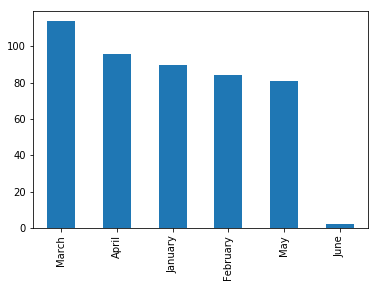

In [71]:
#  killings.month.value_counts().plot.bar()

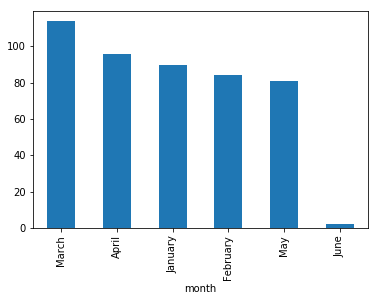

In [76]:
# killings.groupby('month').count()['name'].sort_values(ascending=False).plot(kind='bar')

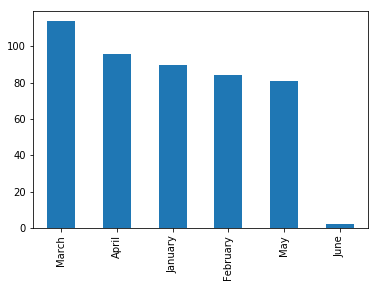

In [154]:
killings.month.value_counts().plot.bar()


## Section 2: College Majors

In [77]:
majors = pd.read_csv('../data/college-majors.csv', index_col=[0])
majors.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


### 1. Delete the columns (employed_full_time_year_round, major_code)


In [78]:
majors.drop(['Employed_full_time_year_round','Major_code'], axis=1, inplace=True)

### 2. Show the count of missing values in each column

In [79]:
majors.isnull().sum()

Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

### 3. What are the top 10 highest paying majors?

In [80]:
majors.head()

,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


In [84]:
majors.sort_values(by='Median', ascending=False)['Major'].head(10)

59                                 PETROLEUM ENGINEERING
154    PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...
57             NAVAL ARCHITECTURE AND MARINE ENGINEERING
55                             METALLURGICAL ENGINEERING
58                                   NUCLEAR ENGINEERING
56                        MINING AND MINERAL ENGINEERING
97                      MATHEMATICS AND COMPUTER SCIENCE
48                                ELECTRICAL ENGINEERING
45                                  CHEMICAL ENGINEERING
51                GEOLOGICAL AND GEOPHYSICAL ENGINEERING
Name: Major, dtype: object

### 4. Plot the data from the last question in a bar chart, include proper title, and labels


<Container object of 10 artists>

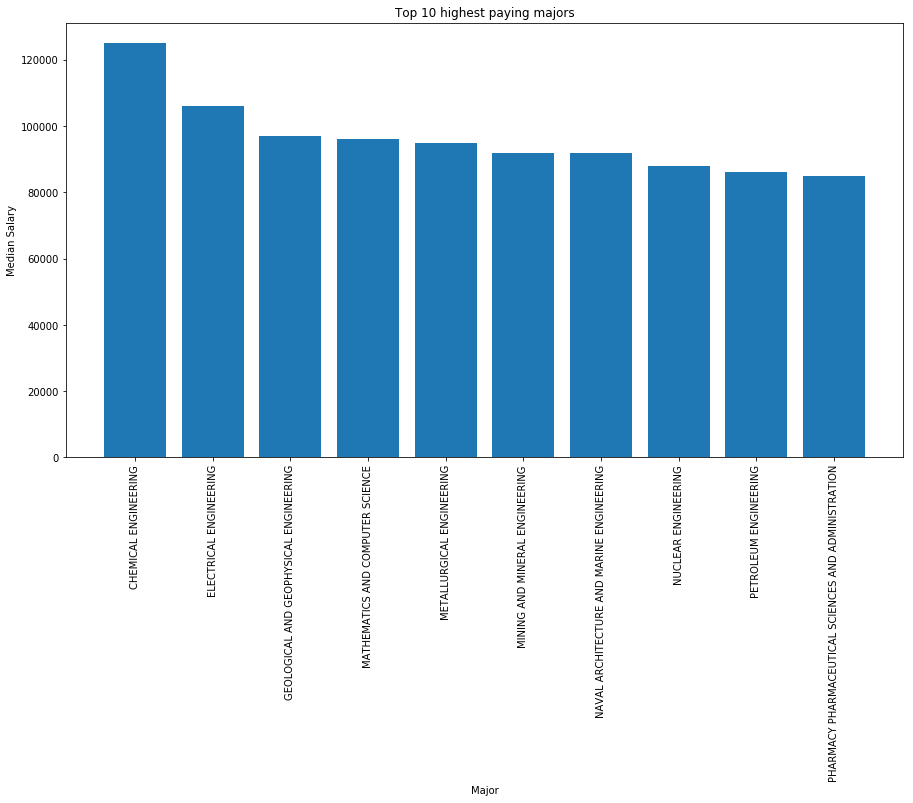

In [85]:
x = majors.sort_values(by='Median', ascending=False).head(10)

plt.figure(figsize=(15,8))
plt.xlabel('Major')
plt.ylabel('Median Salary')
plt.xticks(rotation='vertical')
plt.title('Top 10 highest paying majors')
plt.bar(x.Major.sort_values(), height=x.Median)

### 5. What is the average median salary for each major category?

In [214]:
majors.groupby('Major_category').mean()['Median']

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

### 6. Visualize only the top 5 paying major categories

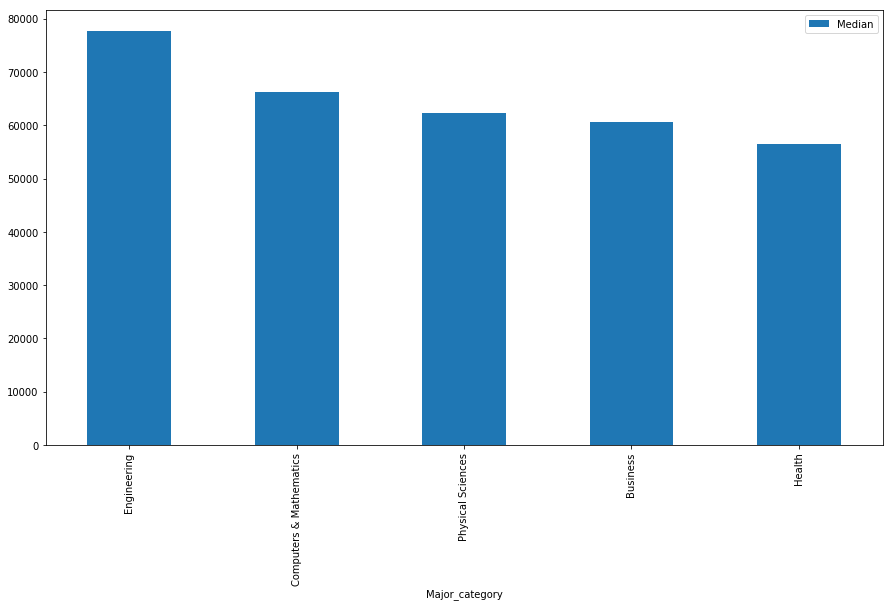

In [87]:
majors.groupby('Major_category').mean().sort_values('Median', ascending=False).head(5).plot.bar(y='Median', figsize=(15,8))

### 7. Plot a histogram of the distribution of median salaries

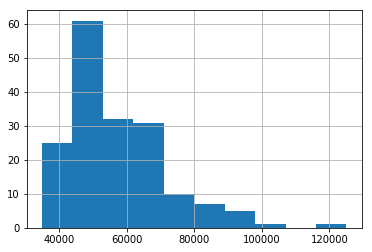

In [226]:
majors.Median.hist()

### 8. Plot a histogram of the distribution of median salaries by major category

In [104]:
majors.groupby('Major_category')['Median']

Major_category
Agriculture & Natural Resources        AxesSubplot(0.125,0.125;0.775x0.755)
Arts                                   AxesSubplot(0.125,0.125;0.775x0.755)
Biology & Life Science                 AxesSubplot(0.125,0.125;0.775x0.755)
Business                               AxesSubplot(0.125,0.125;0.775x0.755)
Communications & Journalism            AxesSubplot(0.125,0.125;0.775x0.755)
Computers & Mathematics                AxesSubplot(0.125,0.125;0.775x0.755)
Education                              AxesSubplot(0.125,0.125;0.775x0.755)
Engineering                            AxesSubplot(0.125,0.125;0.775x0.755)
Health                                 AxesSubplot(0.125,0.125;0.775x0.755)
Humanities & Liberal Arts              AxesSubplot(0.125,0.125;0.775x0.755)
Industrial Arts & Consumer Services    AxesSubplot(0.125,0.125;0.775x0.755)
Interdisciplinary                      AxesSubplot(0.125,0.125;0.775x0.755)
Law & Public Policy                    AxesSubplot(0.125,0.125;0.775x0.75

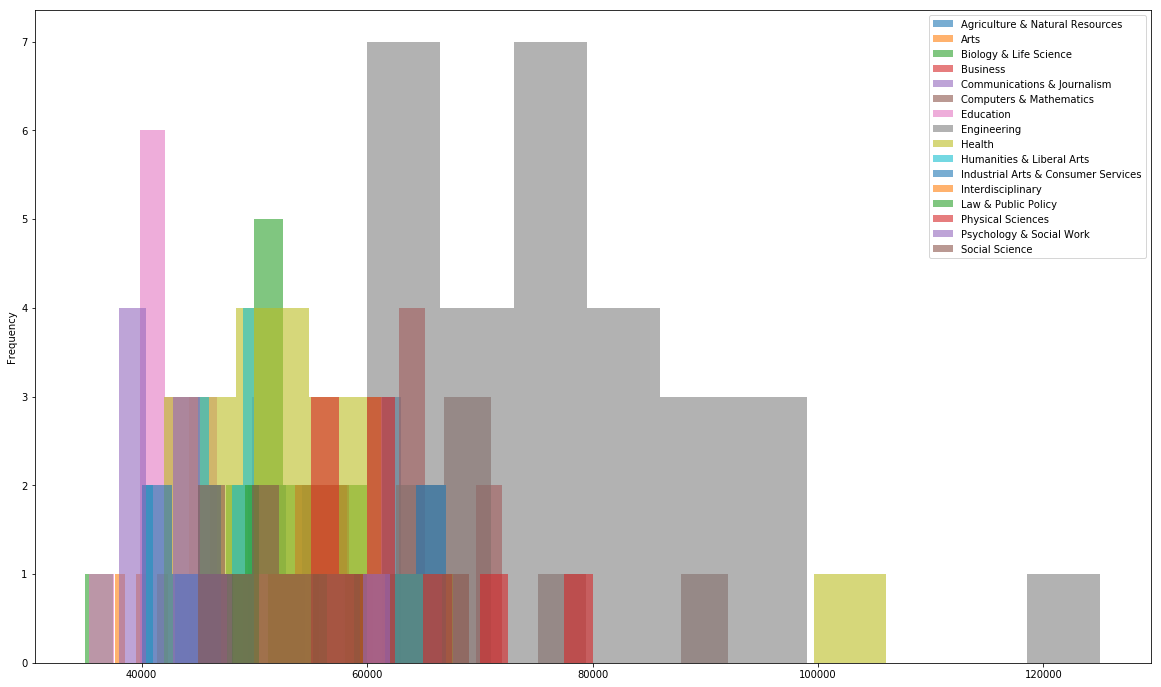

In [105]:
majors.groupby('Major_category')['Median'].plot(kind='hist', alpha=0.6, legend=True, figsize=(20,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27c12978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a29a4a470>]], dtype=object)

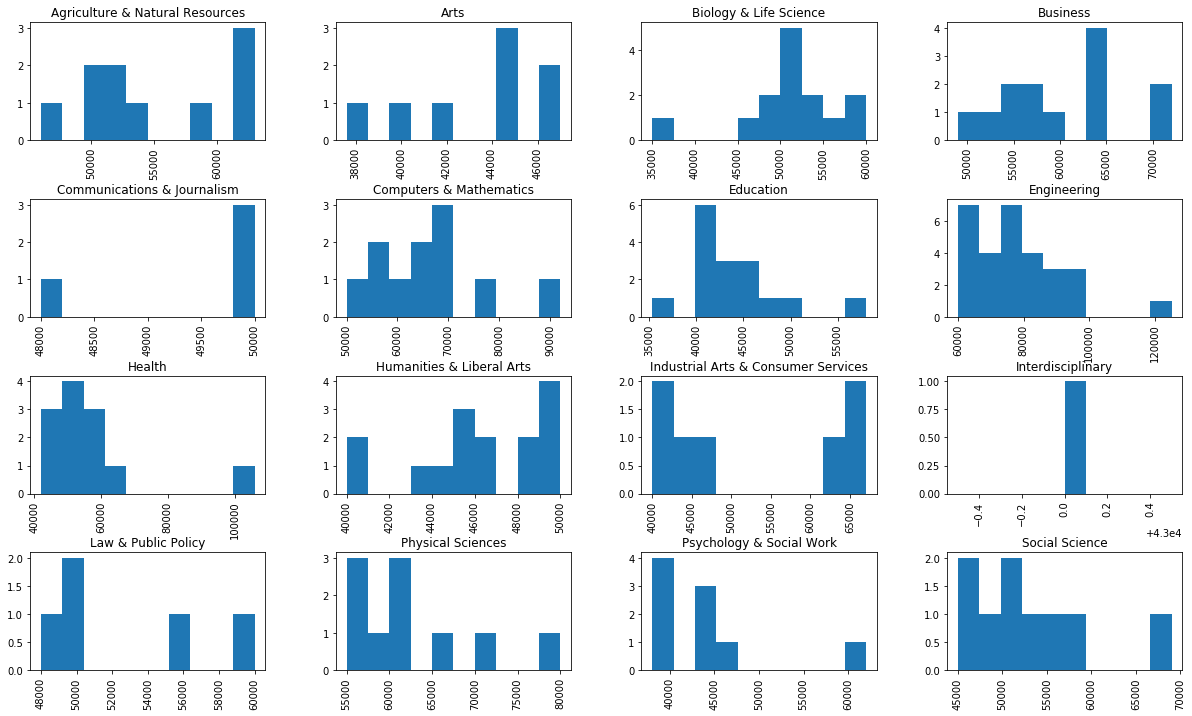

In [234]:
majors.hist(column='Median', by='Major_category', figsize=(20,12))

### 9. What are the top 10 most UNemployed majors?

In [106]:
majors.sort_values(by='Unemployment_rate', ascending=False).head(10)

,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
146,MISCELLANEOUS FINE ARTS,Arts,8511,6431,1190,0.156147,45000,30000,60000.0
116,CLINICAL PSYCHOLOGY,Psychology & Social Work,7638,5128,587,0.102712,45000,26100,62000.0
93,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,4315,1650,187,0.101796,64000,39750,90000.0
27,SCHOOL STUDENT COUNSELING,Education,2396,1492,169,0.101746,41000,33200,50000.0
77,LIBRARY SCIENCE,Education,16193,7091,743,0.094843,40000,30000,55000.0
141,VISUAL AND PERFORMING ARTS,Arts,55141,41098,4297,0.094658,40000,27000,59000.0
19,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,29317,22828,2265,0.090264,60000,40000,85000.0
119,SOCIAL PSYCHOLOGY,Psychology & Social Work,10871,6897,660,0.087336,47000,35000,70000.0
104,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,4700,3400,320,0.086022,80000,40000,106000.0
11,ARCHITECTURE,Engineering,294692,216770,20394,0.085991,63000,40400,93500.0


### 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

In [107]:
majors.groupby('Major_category').mean().sort_values(by='Unemployment_rate', ascending=False).head(10)

,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
Major_category,,,,,,,
Arts,225733.125000,163586.875000,13015.625000,0.087601,43525.000000,29112.500000,64500.000000
Psychology & Social Work,220808.666667,156887.000000,11578.444444,0.077867,44555.555556,31011.111111,64333.333333
Interdisciplinary,45199.000000,35706.000000,2990.000000,0.077269,43000.000000,32000.000000,55000.000000
Humanities & Liberal Arts,249222.333333,166611.666667,11942.400000,0.069429,46080.000000,31413.333333,70933.333333
Communications & Journalism,450955.500000,355760.250000,25299.750000,0.069125,49500.000000,34000.000000,76250.000000
Law & Public Policy,180585.200000,143784.800000,8609.800000,0.067854,52800.000000,36200.000000,78800.000000
Social Science,294902.777778,207978.111111,14683.333333,0.065686,53222.222222,37144.444444,81222.222222
Computers & Mathematics,161943.454545,128237.000000,7270.363636,0.059437,66272.727273,43427.272727,95818.181818
Industrial Arts & Consumer Services,147685.428571,107683.142857,5765.714286,0.058546,52642.857143,35064.285714,76857.142857


## Section 3: FIFA Soccer Game data

In [8]:
fifa = pd.read_csv('../data/fifa_data.csv')
fifa.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


### 1. Clean up the dataset.

    - Lowercase the column names
    - Set the "name" column as the index
    - Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
    - Get rid of all players who are goalkeepers and drop every column that starts with GK
    - Drop every player whose rating is less than 70
    - Convert the "height" and "weight" columns to float types
    - Check to see if there any nulls, if so drop them from the dataset

In [9]:
#Lowercase the column names
fifa.columns = fifa.columns.str.lower()

In [10]:
#Set the "name" column as the index
fifa.set_index('name', inplace=True)

In [11]:
#Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
fifa.drop(['national_position','national_kit','club_kit','club_joining','contract_expiry'], axis=1, inplace=True)

In [12]:
#Get rid of all players who are goalkeepers and drop every column that starts with GK
# fifa[(fifa.preffered_position=='GK') & (fifa.preffered_position.str.startswith('GK'))].head()
# (fifa.preffered_position==('LW')).sum()
# fifa.count()
# ((fifa.preffered_position=='GK') | (fifa.preffered_position.str.startswith('GK'))).sum()
# fifa[(fifa.preffered_position=='GK') | (fifa.preffered_position.str.startswith('GK'))].index
fifa.drop(fifa[(fifa.preffered_position=='GK') | (fifa.preffered_position.str.startswith('GK'))].index,inplace=True)

In [13]:
# fifa.count()

In [14]:
#Drop every player whose rating is less than 70
fifa.drop(fifa[fifa.rating<70].index, inplace=True)

In [15]:
#Convert the "height" and "weight" columns to float types
fifa.height = fifa.height.str.replace('cm','').astype('float')
fifa.weight = fifa.weight.str.replace('kg','').astype('float')

In [16]:
# Check to see if there any nulls, if so drop them from the dataset
fifa.dropna(inplace=True)

In [17]:
fifa.head()

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,long_shots,curve,freekick_accuracy,penalties,volleys,gk_positioning,gk_diving,gk_kicking,gk_handling,gk_reflexes
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185.0,80.0,Right,02/05/1985,32,LW/ST,...,90,81,76,85,88,14,7,15,11,11
Lionel Messi,Argentina,FC Barcelona,RW,93,170.0,72.0,Left,06/24/1987,29,RW,...,88,89,90,74,85,14,6,15,11,8
Neymar,Brazil,FC Barcelona,LW,92,174.0,68.0,Right,02/05/1992,25,LW,...,77,79,84,81,83,15,9,15,9,11
Luis Suárez,Uruguay,FC Barcelona,ST,92,182.0,85.0,Right,01/24/1987,30,ST,...,86,86,84,85,88,33,27,31,25,37
Robert Lewandowski,Poland,FC Bayern,ST,90,185.0,79.0,Right,08/21/1988,28,ST,...,82,77,76,81,86,8,15,12,6,10


### 2.  Who are the top five players of the following attributes: speed, marking, and finishing

In [18]:
fifa.sort_values(by='speed', ascending=False).head()[['speed']]

,speed
name,
Jonathan Biabiany,96
Pierre-Emerick Aubameyang,96
Williams,95
Ernest Asante,95
Víctor Ibarbo,95


In [19]:
fifa.sort_values(by='marking', ascending=False).head()[['marking']]

,marking
name,
Giorgio Chiellini,92
Andrea Barzagli,90
Thiago Silva,90
Jérôme Boateng,90
Miranda,89


In [20]:
fifa.sort_values(by='finishing', ascending=False).head()[['finishing']]

,finishing
name,
Lionel Messi,95
Luis Suárez,94
Cristiano Ronaldo,93
Gonzalo Higuaín,92
Robert Lewandowski,91


### 3. Who is the tallest French lefted foot player?

In [21]:
fifa.head()
# fifa.nationality.unique()

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,long_shots,curve,freekick_accuracy,penalties,volleys,gk_positioning,gk_diving,gk_kicking,gk_handling,gk_reflexes
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185.0,80.0,Right,02/05/1985,32,LW/ST,...,90,81,76,85,88,14,7,15,11,11
Lionel Messi,Argentina,FC Barcelona,RW,93,170.0,72.0,Left,06/24/1987,29,RW,...,88,89,90,74,85,14,6,15,11,8
Neymar,Brazil,FC Barcelona,LW,92,174.0,68.0,Right,02/05/1992,25,LW,...,77,79,84,81,83,15,9,15,9,11
Luis Suárez,Uruguay,FC Barcelona,ST,92,182.0,85.0,Right,01/24/1987,30,ST,...,86,86,84,85,88,33,27,31,25,37
Robert Lewandowski,Poland,FC Bayern,ST,90,185.0,79.0,Right,08/21/1988,28,ST,...,82,77,76,81,86,8,15,12,6,10


In [22]:
fifa[(fifa.preffered_foot=='Left') & (fifa.nationality=='France')].sort_values(by='height',ascending=False).head(1)[['nationality','preffered_foot','height']]

,nationality,preffered_foot,height
name,,,
Romain Thomas,France,Left,193.0


### 4. Show a pandas series of every attribute's correlation with the rating attribute

In [23]:
fifa.corr()['rating']


rating                1.000000
height                0.040371
weight                0.047186
age                   0.051859
weak_foot             0.127960
skill_moves           0.204464
ball_control          0.471626
dribbling             0.300967
marking               0.057540
sliding_tackle        0.083309
standing_tackle       0.100709
aggression            0.161910
reactions             0.694297
attacking_position    0.241231
interceptions         0.121417
vision                0.314369
composure             0.485289
crossing              0.232307
short_pass            0.510557
long_pass             0.352794
acceleration          0.120604
speed                 0.125854
stamina               0.198177
strength              0.104903
balance               0.071821
agility               0.137261
jumping               0.103887
heading               0.199729
shot_power            0.295959
finishing             0.224991
long_shots            0.251752
curve                 0.261869
freekick

### 5. Make a heatmap of the dataset's correlation table

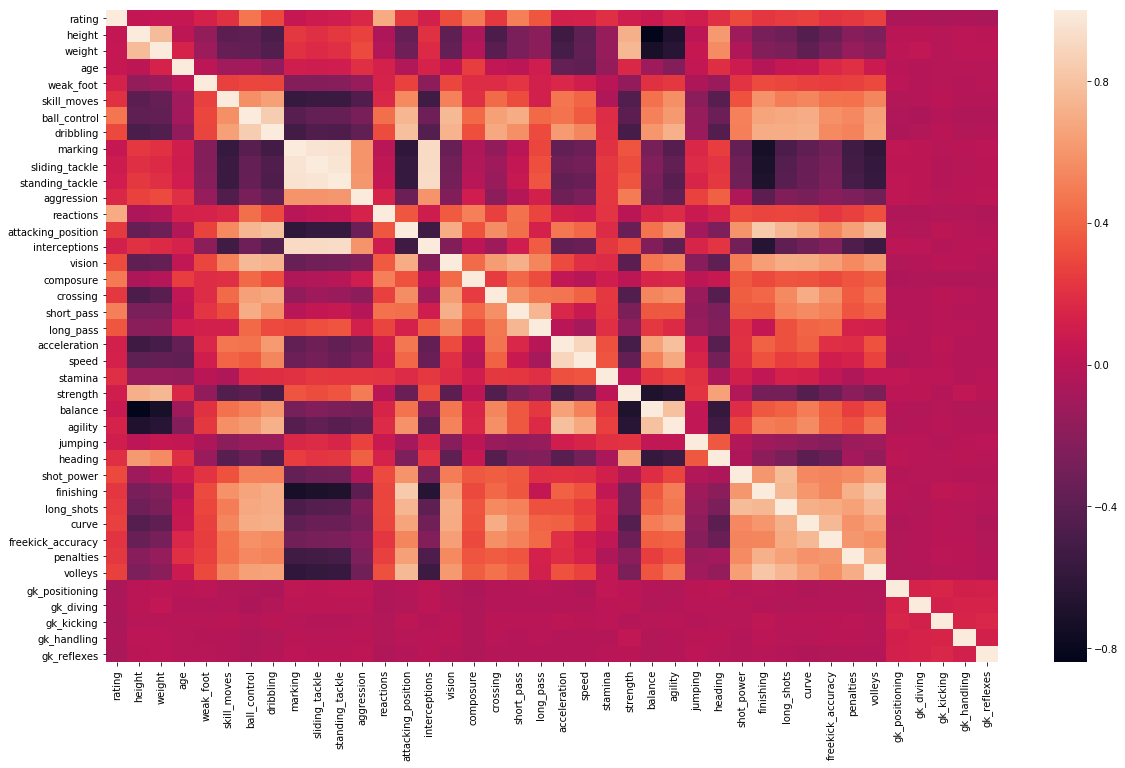

In [27]:
plt.figure(figsize=(20,12))
sns.heatmap(fifa.corr())

### 6. Return a dataframe with only players from the following clubs. Call the dataframe fifa2. From now on we'll be using fifa2

In [30]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
       'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma']

In [31]:
fifa.columns

Index(['nationality', 'club', 'club_position', 'rating', 'height', 'weight',
       'preffered_foot', 'birth_date', 'age', 'preffered_position',
       'work_rate', 'weak_foot', 'skill_moves', 'ball_control', 'dribbling',
       'marking', 'sliding_tackle', 'standing_tackle', 'aggression',
       'reactions', 'attacking_position', 'interceptions', 'vision',
       'composure', 'crossing', 'short_pass', 'long_pass', 'acceleration',
       'speed', 'stamina', 'strength', 'balance', 'agility', 'jumping',
       'heading', 'shot_power', 'finishing', 'long_shots', 'curve',
       'freekick_accuracy', 'penalties', 'volleys', 'gk_positioning',
       'gk_diving', 'gk_kicking', 'gk_handling', 'gk_reflexes'],
      dtype='object')

In [33]:
fifa2 = fifa[fifa.club.isin(clubs_list)]

### 7. Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in the data

/Users/roahuja/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


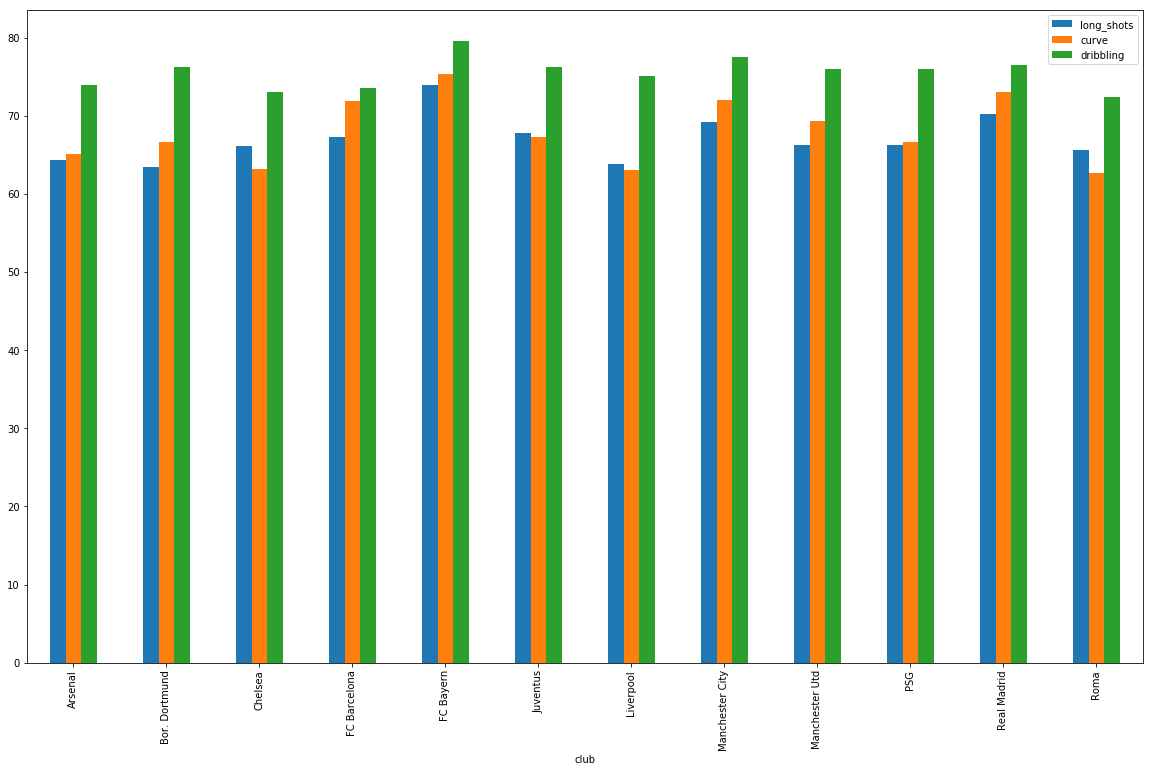

In [36]:
fifa2.groupby('club').mean().plot(kind='bar', y=['long_shots', 'curve', 'dribbling'], figsize=(20,12))

### 8. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots.

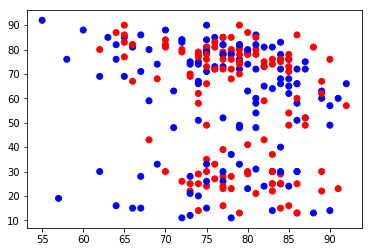

In [45]:
c=['r','b']
# c=['pink','green']
plt.scatter(fifa2.short_pass, fifa2.marking, c=c)

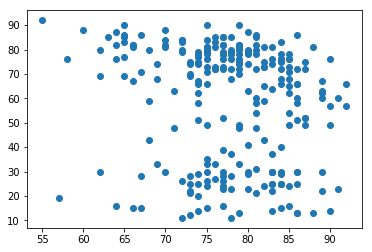

In [48]:
# cmap ={"r":"Left", "b":"Right"}
# cmap ={"Left":"r", "Right":"b"}

# plt.scatter(fifa2.short_pass, fifa2.marking, cmap=cmap)

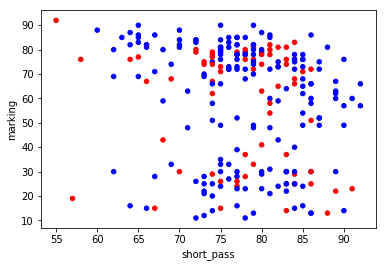

In [70]:
# cmap ={"r":"Left", "b":"Right"}
cmap ={"Left":"r", "Right":"b"}
colors = fifa2.preffered_foot.map(cmap)
fifa2.plot.scatter('short_pass', 'marking', c=colors)

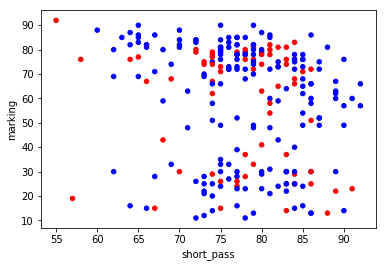

In [71]:
cmap ={"Left":"r", "Right":"b"}
colors = fifa2.preffered_foot.map(cmap)
fifa2.plot(kind='scatter',x='short_pass', y='marking', c=colors)

### 9. Make a grouped boxplots using club_position as the x axis for the following attributes: dribbling, balance, and sliding_tackle

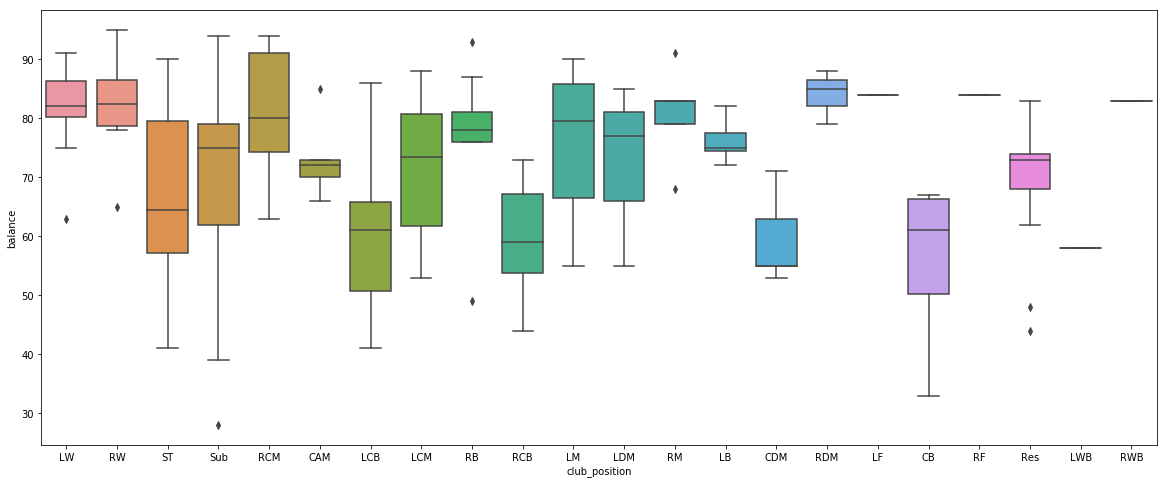

In [82]:
#Dribbling boxplot

plt.figure(figsize=(20,8))
sns.boxplot(data=fifa2, x='club_position', y='dribbling')

Which position is better at dribbling? ST or RCM? Why?

RCM - because the Range is higher and the median is higher

In [ ]:
# fifa2.club_position.unique()

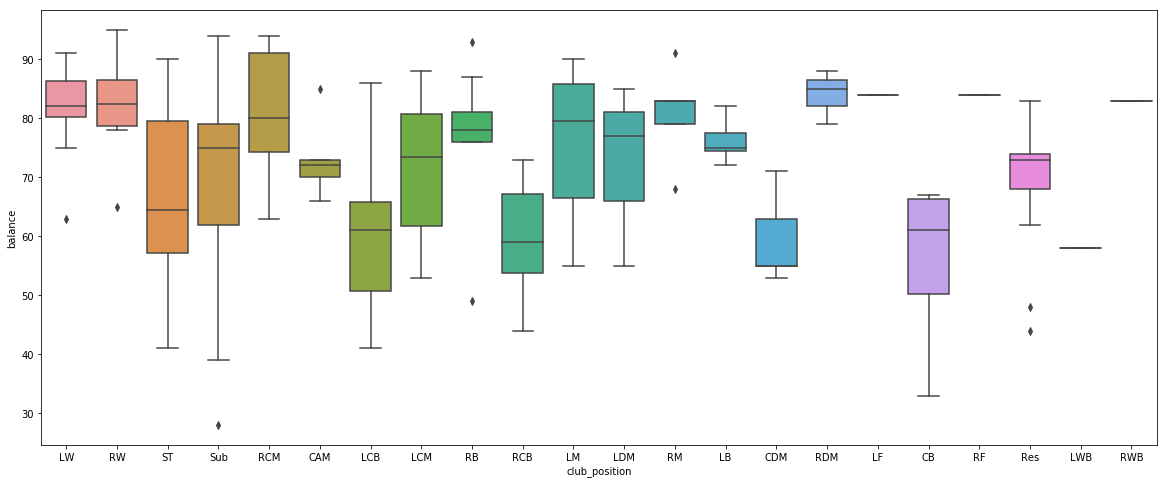

In [85]:
#Balance boxplot

plt.figure(figsize=(20,8))
sns.boxplot(data=fifa2, x='club_position', y='balance')

Which position is better at balance? LM or LDM? Why?

LM - because the Range is higher and the median is higher

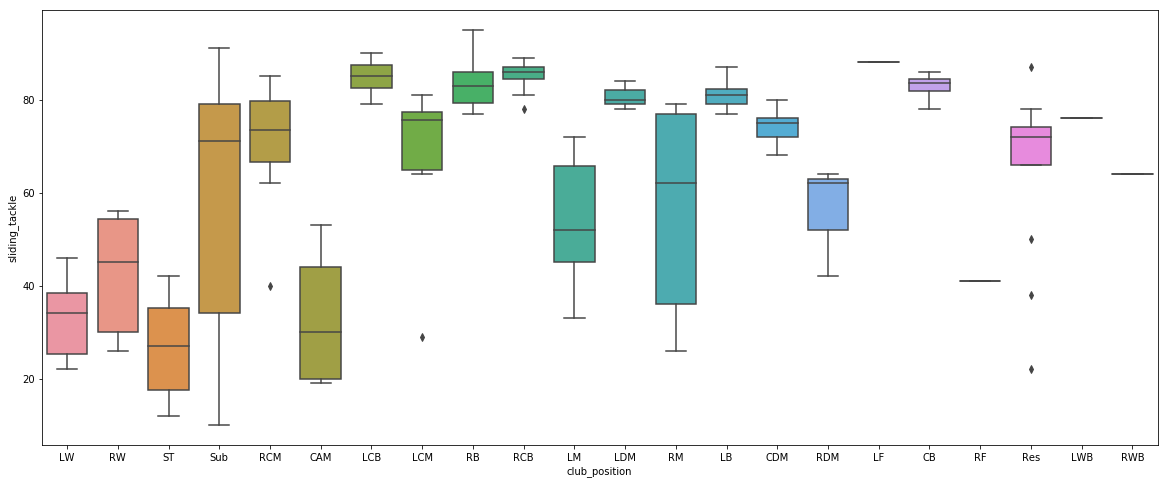

In [86]:
#sliding_tackle boxplot

plt.figure(figsize=(20,8))
sns.boxplot(data=fifa2, x='club_position', y='sliding_tackle')

What is the IQR for positions ST, RB, and RM?

IQR = Interquartile range 
ST - (35 - 15) = 20
RB - (85 - 78) = 7 
RM - (75 - 35) = 40
